In [936]:
#load in packages
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import contextily as cx

In [937]:
#Read in dpdcalls data set
dpdcalls = gpd.read_file('/Users/sadiesheridan/Desktop/dpdshapefile/dpdshapefile.shp')
dpdcalls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [938]:
#Read in policebeats data set
policebeats = gpd.read_file('/Users/sadiesheridan/Desktop/Police_Beats/Police_Beats.shp')
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [939]:
#Print .info() for policebeats
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    119 non-null    int64   
 1   PERIMETER   119 non-null    float64 
 2   STATUS      83 non-null     object  
 3   CONTIGUOUS  83 non-null     object  
 4   LAWDIST     119 non-null    object  
 5   LAWBEAT     119 non-null    int64   
 6   CAD         119 non-null    object  
 7   GIS_DataA1  0 non-null      object  
 8   ShapeSTAre  119 non-null    float64 
 9   ShapeSTLen  119 non-null    float64 
 10  geometry    119 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 10.4+ KB


In [940]:
#Print .info() for dpdcalls
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 331077 entries, 0 to 331076
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  331077 non-null  int64   
 1   Case Numbe  45954 non-null   object  
 2   Call Date   331077 non-null  object  
 3   Call Time   331077 non-null  object  
 4   Source      331077 non-null  object  
 5   Priority    330425 non-null  object  
 6   Nature      331076 non-null  object  
 7   Address     330437 non-null  object  
 8   X           331077 non-null  int64   
 9   Y           331077 non-null  int64   
 10  District    319334 non-null  object  
 11  Beat        319315 non-null  object  
 12  Dispositio  331077 non-null  object  
 13  Cancelled   331077 non-null  int64   
 14  geometry    331077 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 37.9+ MB


In [941]:
#Print null values with df.isna().sum() function
dpdcalls.isna().sum()

Event Numb         0
Case Numbe    285123
Call Date          0
Call Time          0
Source             0
Priority         652
Nature             1
Address          640
X                  0
Y                  0
District       11743
Beat           11762
Dispositio         0
Cancelled          0
geometry           0
dtype: int64

In [942]:
#Looking at records with coordinates zero
dpdcalls.loc[(dpdcalls["X"] == 0) | (dpdcalls["Y"] == 0)]

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
127,21000194,None,1/1/2021,1:25:25AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 11 147 NB,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
131,21000199,None,1/1/2021,1:29:04AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 147S AND BLACKWELL ST,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
210,21000322,None,1/1/2021,3:56:22AM,Self Initiated,5,DIRECTED PATROL,3407 3RD FORK RD,0,0,None,None,Cancelled,1,POINT (-85.56829 33.56815)
255,21000381,None,1/1/2021,6:14:49AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 1010 N DURHAM FREEWAY,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
274,21000409,None,1/1/2021,7:03:23AM,Self Initiated,4,FOLLOW UP,SS1,0,0,None,None,Resolved Without Report,0,POINT (-85.56829 33.56815)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330699,21477803,21045233,12/31/2021,6:00:48PM,Mobil,4,ATTEMPT TO LOCATE,UNAUTHORIZED USE AT 215 WILLIAM PENN PLAZA APT...,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
330858,21478039,None,12/31/2021,8:24:41PM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 4623 DURHAM CHAPEL HI...,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
330963,21478179,None,12/31/2021,10:06:37PM,Self Initiated,4,PROPERTY CHECK,1223 HOMECOMING WY,0,0,None,None,Resolved Without Report,0,POINT (-85.56829 33.56815)
331057,21478324,None,12/31/2021,11:45:43PM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 17900 I85 S,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)


In [943]:
#Filter out null x and y values
dpdcalls = dpdcalls.loc[~(dpdcalls["X"] == 0) & ~(dpdcalls["Y"] == 0)].copy()
dpdcalls.shape

(322145, 15)

In [944]:
#Filter out cancelled calls and self initiated calls
dpdcalls = dpdcalls.loc[dpdcalls["Source"] != "Self Initiated"].copy()
dpdcalls = dpdcalls.loc[dpdcalls["Cancelled"] == 0].copy()
dpdcalls = dpdcalls.loc[(dpdcalls["Beat"] != "DSO") & (dpdcalls["Beat"] != "SSA")].copy()
dpdcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)


In [945]:
#Filter out beats not in Durham for policebeats
policebeats_list = [121, 122, 112, 111, 123, 114, 113, 124, 212, 214, 213, 211, 223, 222, 221, 224, 313, 312, 321, 314, 323, 324, 322, 311, 411, 415, 412, 413, 414, 422, 421, 423, 511, 512, 513]
policebeats = policebeats.loc[policebeats["LAWBEAT"].isin(policebeats_list)].copy()
policebeats.shape

(83, 11)

In [946]:
#Print changes
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 122782 entries, 0 to 331065
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  122782 non-null  int64   
 1   Case Numbe  34312 non-null   object  
 2   Call Date   122782 non-null  object  
 3   Call Time   122782 non-null  object  
 4   Source      122782 non-null  object  
 5   Priority    122244 non-null  object  
 6   Nature      122782 non-null  object  
 7   Address     122782 non-null  object  
 8   X           122782 non-null  int64   
 9   Y           122782 non-null  int64   
 10  District    122127 non-null  object  
 11  Beat        122107 non-null  object  
 12  Dispositio  122782 non-null  object  
 13  Cancelled   122782 non-null  int64   
 14  geometry    122782 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 15.0+ MB


In [947]:
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83 entries, 11 to 118
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    83 non-null     int64   
 1   PERIMETER   83 non-null     float64 
 2   STATUS      83 non-null     object  
 3   CONTIGUOUS  83 non-null     object  
 4   LAWDIST     83 non-null     object  
 5   LAWBEAT     83 non-null     int64   
 6   CAD         83 non-null     object  
 7   GIS_DataA1  0 non-null      object  
 8   ShapeSTAre  83 non-null     float64 
 9   ShapeSTLen  83 non-null     float64 
 10  geometry    83 non-null     geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 7.8+ KB


In [948]:
#Merge Calls and Beats data sets with point geometry
dpd_w_policebeats = gpd.sjoin(dpdcalls, policebeats)
dpd_w_policebeats

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,...,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,...,47,61714.988281,I,yes,D1,121,121,None,3.419525e+07,61714.987980
81,21000125,None,1/1/2021,12:46:53AM,Phone Call,3,SOUND OF SHOTS,PEBBLESTONE DR/KNIGHTWOOD DR,2056514,821822,...,47,61714.988281,I,yes,D1,121,121,None,3.419525e+07,61714.987980
1117,21001615,21000126,1/2/2021,11:30:25AM,Wireless 911 Call,4,DAMAGE TO PROPERTY,0 AUTUMN LEAF LN,2053898,824503,...,47,61714.988281,I,yes,D1,121,121,None,3.419525e+07,61714.987980
1226,21001780,21000150,1/2/2021,2:12:39PM,Wireless 911 Call,4,LARCENY,3600 CARDINAL LAKE DR,2056795,825199,...,47,61714.988281,I,yes,D1,121,121,None,3.419525e+07,61714.987980
1319,21001917,None,1/2/2021,4:50:21PM,Phone Call,3,SUSPICIOUS PERSON,ESTERBROOK CT/PEBBLESTONE DR,2055583,819061,...,47,61714.988281,I,yes,D1,121,121,None,3.419525e+07,61714.987980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286528,21411398,None,11/10/2021,12:57:06PM,Wireless 911 Call,3,ASSAULT,3000 MT SINAI RD,2002584,814666,...,69,4025.813965,I,yes,D3,321,321,None,9.559212e+05,4025.813820
190058,21266548,None,7/25/2021,2:51:58PM,Wireless 911 Call,2,URGENT WELFARE CHECK,5500 LEESVILLE RD,2060394,797620,...,98,1949.288940,I,no,D1,124,124,None,1.472133e+05,1949.288667
264761,21378037,None,10/16/2021,2:45:39AM,Phone Call,2,ASSIST EMS,5500 LEESVILLE RD,2060372,797622,...,98,1949.288940,I,no,D1,124,124,None,1.472133e+05,1949.288667
294180,21423205,21039914,11/19/2021,5:41:45PM,Wireless 911 Call,3,HIT AND RUN,FLETCHERS CHAPEL RD/BRIGHTWOOD LN,2058319,823738,...,48,8026.809082,I,no,D1,121,121,None,2.376268e+06,8026.808931


In [949]:
#Print merged data set info
dpd_w_policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 121813 entries, 0 to 317694
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Event Numb   121813 non-null  int64   
 1   Case Numbe   33722 non-null   object  
 2   Call Date    121813 non-null  object  
 3   Call Time    121813 non-null  object  
 4   Source       121813 non-null  object  
 5   Priority     121708 non-null  object  
 6   Nature       121813 non-null  object  
 7   Address      121813 non-null  object  
 8   X            121813 non-null  int64   
 9   Y            121813 non-null  int64   
 10  District     121724 non-null  object  
 11  Beat         121723 non-null  object  
 12  Dispositio   121813 non-null  object  
 13  Cancelled    121813 non-null  int64   
 14  geometry     121813 non-null  geometry
 15  index_right  121813 non-null  int64   
 16  OBJECTID     121813 non-null  int64   
 17  PERIMETER    121813 non-null  float64 
 

In [950]:
policebeats_w_dpd = gpd.sjoin(policebeats, dpdcalls)
policebeats_w_dpd.info

<bound method DataFrame.info of      OBJECTID     PERIMETER STATUS CONTIGUOUS LAWDIST  LAWBEAT  CAD  \
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
11         12  94210.453125      I         no      D2      224  224   
..        ...           ...    ...        ...     ...      ...  ...   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   
117       118  18538.599609      I         no      D4      422  422   

    GIS_DataA1    ShapeSTAre    ShapeSTLen  ...             Source  Priority  \
11        None  7.014559e+07  94210

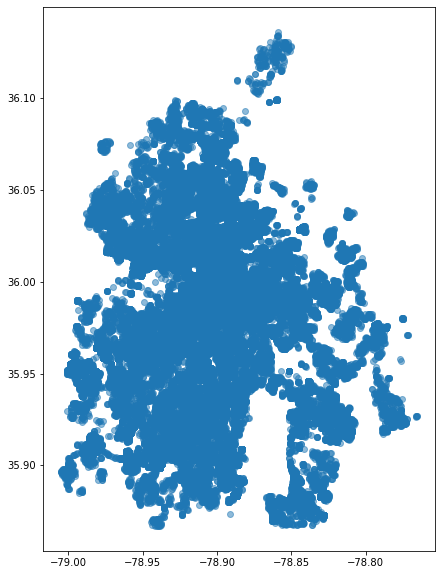

In [951]:
#Plot the dpd_w_policebeats data
fig, ax = plt.subplots(figsize = (10,10))
dpd_w_policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

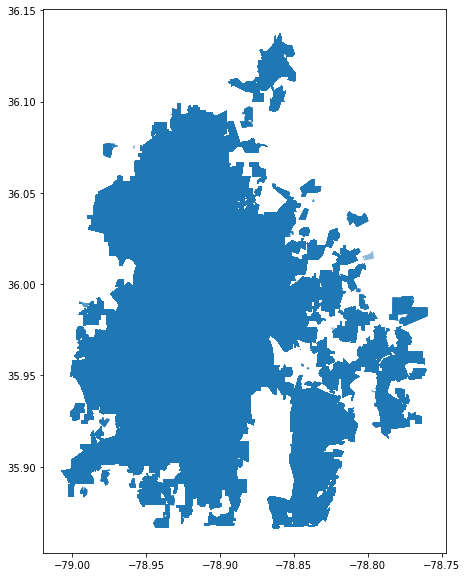

In [952]:
#Plot the policebeats_w_dpd data
fig, ax = plt.subplots(figsize = (10,10))
policebeats_w_dpd.plot(ax = ax, alpha = 0.5)
plt.show()

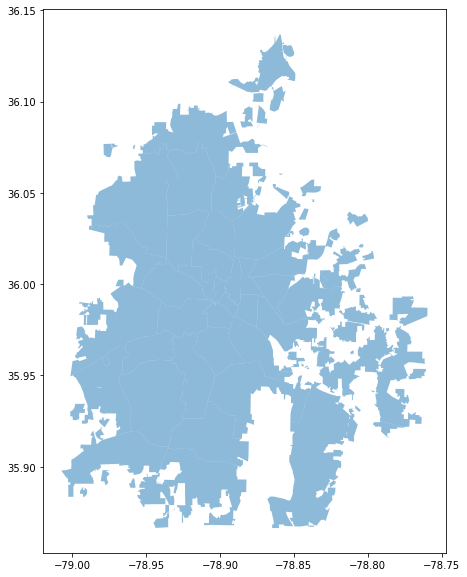

In [953]:
# Plot the beat data using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))
policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

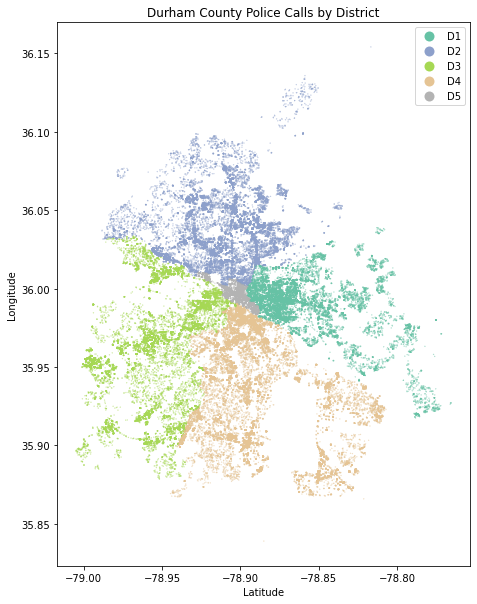

In [954]:
# Plot the call data by district using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpdcalls.plot(column='District', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="Set2", ax=ax, aspect=1);


ax.set(title='Durham County Police Calls by District')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

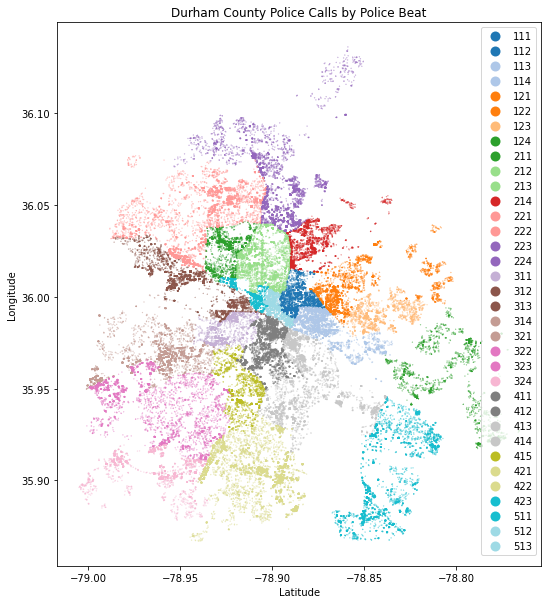

In [955]:
# Plot the dpd_w_policebeats data by Beat using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="tab20", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

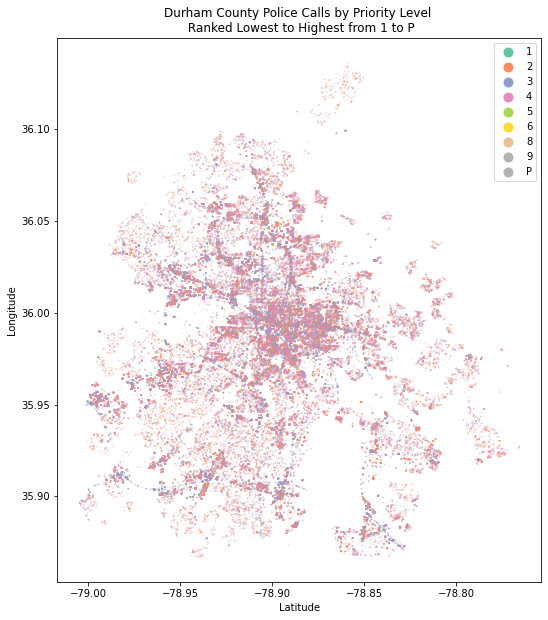

In [956]:
# Plot the call data by Priority using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='Priority', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Set2", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Priority Level \n Ranked Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

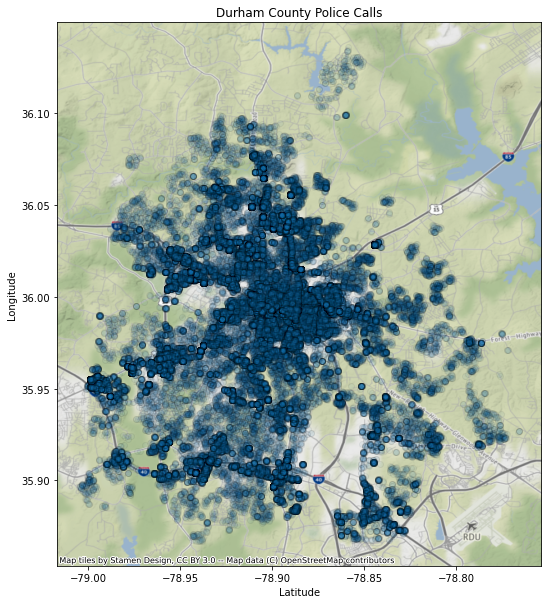

In [957]:
#Adding a base map to the caller data
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.05, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs)

ax.set(title='Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

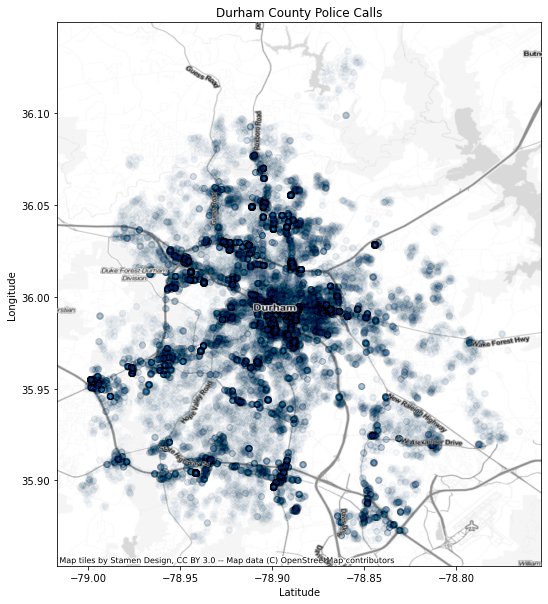

In [958]:
#Adding a base map to the caller data with labels
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.01, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs=dpd_w_policebeats.crs, source=cx.providers.Stamen.TonerLabels)

ax.set(title='Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

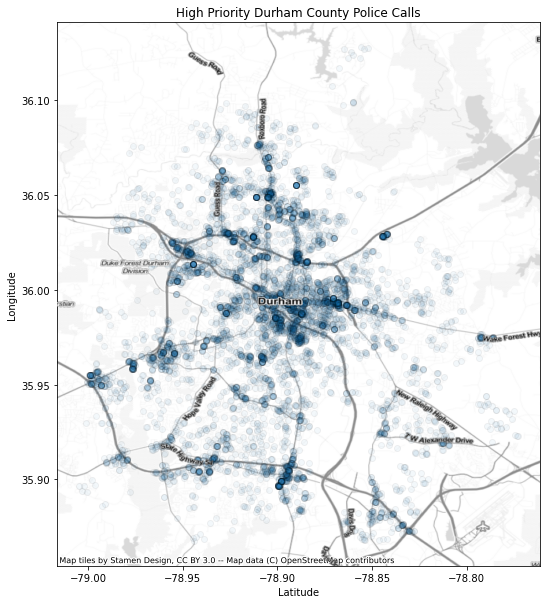

In [959]:
#Mapping high priority calls over a street map
PriorityCalls = dpd_w_policebeats.loc[dpd_w_policebeats['Priority'] == 'P']

ax = PriorityCalls.plot(figsize=(10, 10), alpha=0.05, edgecolor='k')
cx.add_basemap(ax, crs=PriorityCalls.crs, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs=PriorityCalls.crs, source=cx.providers.Stamen.TonerLabels)

ax.set(title='High Priority Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

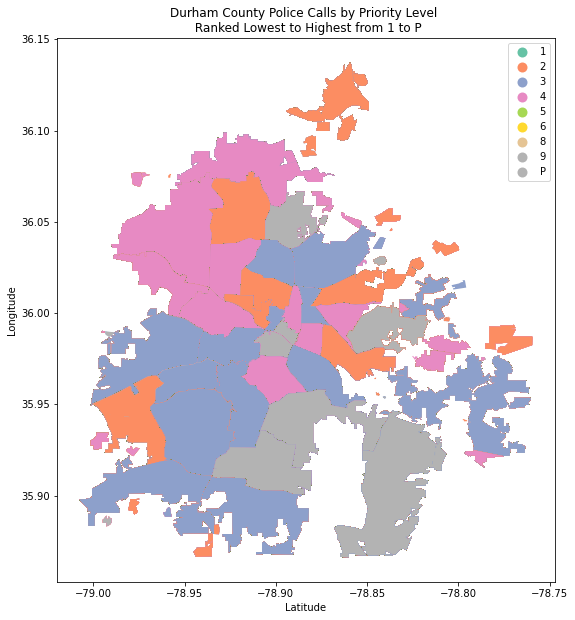

In [960]:
#Plotting the policebeats_w_dpd data by priority level
fig, ax = plt.subplots(figsize = (10,10))

policebeats_w_dpd.plot(column='Priority', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Set2", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Priority Level \n Ranked Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

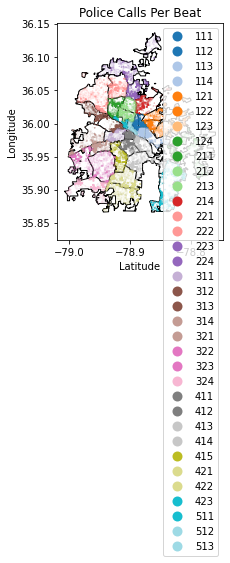

In [961]:
#Plot the two data sets together setting the aspect 'equal'
fig, ax = plt.subplots()

ax.set_aspect('equal')

policebeats.plot(ax=ax, color='white', edgecolor='black')

dpdcalls.plot(ax=ax, column='Beat', categorical=True, legend=True, marker='o', cmap='tab20', markersize=0.001)

ax.set(title='Police Calls Per Beat')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

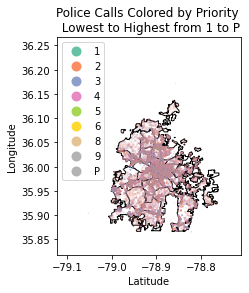

In [962]:
#Plot the two data sets together setting the aspect 'equal' by priority
fig, ax = plt.subplots()

ax.set_aspect('equal')

policebeats.plot(ax=ax, color='white', edgecolor='black')

dpdcalls.plot(ax=ax, column='Priority', categorical=True, legend=True, marker='o', cmap='Set2', markersize=0.001)

ax.set(title='Police Calls Colored by Priority \n Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

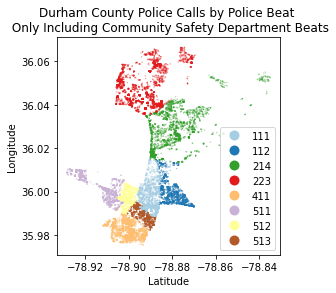

In [963]:
#Plot the two data sets together with only community safety beats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
commsafe = dpd_w_policebeats.loc[dpd_w_policebeats['LAWBEAT'].isin(commsafe_list)].copy()
commsafe.head()

fig, ax=plt.subplots()

commsafe.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Paired", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat \n Only Including Community Safety Department Beats')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [964]:
#Count the calls in each beat
dpd_w_policebeats.groupby("Beat")["Beat"].count()

Beat
111    2730
112    2662
113    3095
114    3041
121    2771
122    3492
123    2890
124    2030
211    4174
212    3404
213    4018
214    3817
221    4273
222    3348
223    5329
224    2867
311    2848
312    2963
313    3756
314    3381
321    3333
322    2626
323    3077
324    3773
411    3926
412    3462
413    3660
414    3587
415    3124
421    4677
422    4633
423    5844
511    2564
512    2931
513    3617
Name: Beat, dtype: int64

In [965]:
#Find the beat with highest proportion of priority calls
#Create filtered call data with only P calls
Pcalls = dpdcalls.loc[(dpdcalls["Priority"] == "P")].copy()

In [966]:
#Grouping policebeats_w_dpd by beat
#Create a new data frame called allcalls
allcalls = policebeats_w_dpd.groupby(['Beat']).size().to_frame(name = 'calls_count').reset_index()
allcalls

,Beat,calls_count
0,111,2730
1,112,2662
2,113,3095
3,114,3041
4,121,2771
5,122,3492
6,123,2890
7,124,2030
8,211,4174
9,212,3404


In [967]:
#Grouping priority calls by beat
#Creating new data frame called onlypcalls
onlypcalls = Pcalls.groupby(['Beat']).size().to_frame(name = 'pcalls_count').reset_index()
onlypcalls

,Beat,pcalls_count
0,111,236
1,112,216
2,113,274
3,114,192
4,121,209
5,122,303
6,123,203
7,124,157
8,211,292
9,212,204


In [968]:
#Add a proportions column to combcalls
combcalls = pd.merge(allcalls, onlypcalls, on ='Beat')

combcalls['prop_of_pcalls']= combcalls['pcalls_count'] / combcalls['calls_count']

combcalls.sort_values(by='prop_of_pcalls', inplace=True, ascending=False)

combcalls.head()

,Beat,calls_count,pcalls_count,prop_of_pcalls
24,411,3926,374,0.095262
2,113,3095,274,0.088530
5,122,3492,303,0.086770
0,111,2730,236,0.086447
29,421,4677,388,0.082959


In [969]:
#Copy policebeats and rename column LAWBEAT
policebeats2 = policebeats.copy()

policebeats2.rename(columns=({'LAWBEAT':'Beat'}), inplace=True)

In [970]:
#Change Beat column to a string in policebeats2 data set
policebeats2["Beat"] = policebeats2["Beat"].map(lambda g: str(int(g+0.1)))

In [971]:
#Merge policebeats_w_dpd with combcalls
#Label merged data as combcalls_merge
combcalls_merge = pd.merge(combcalls, policebeats2, on ='Beat')

combcalls_merge.head(3)

,Beat,calls_count,pcalls_count,prop_of_pcalls,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,411,3926,374,0.095262,67,24141.640625,I,yes,D4,411,None,2.140812e+07,24141.641318,"POLYGON ((-78.90125 35.98965, -78.89941 35.988..."
1,113,3095,274,0.088530,62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,"POLYGON ((-78.87372 35.99369, -78.87458 35.991..."
2,122,3492,303,0.086770,54,36686.679688,I,yes,D1,122,None,3.436298e+07,36686.681354,"POLYGON ((-78.84694 36.00614, -78.84634 36.006..."


In [972]:
#Merged the caller data with combcalls by changing the index
combcalls_merge = policebeats2.set_index('Beat').join(combcalls.set_index('Beat'))

combcalls_merge.head(3)

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry,calls_count,pcalls_count,prop_of_pcalls
Beat,,,,,,,,,,,,,
111,50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",2730,236,0.086447
112,51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",2662,216,0.081142
113,62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",3095,274,0.088530


In [973]:
#Show merged data info
combcalls_merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 83 entries, 111 to 513
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        83 non-null     int64   
 1   PERIMETER       83 non-null     float64 
 2   STATUS          83 non-null     object  
 3   CONTIGUOUS      83 non-null     object  
 4   LAWDIST         83 non-null     object  
 5   CAD             83 non-null     object  
 6   GIS_DataA1      0 non-null      object  
 7   ShapeSTAre      83 non-null     float64 
 8   ShapeSTLen      83 non-null     float64 
 9   geometry        83 non-null     geometry
 10  calls_count     83 non-null     int64   
 11  pcalls_count    83 non-null     int64   
 12  prop_of_pcalls  83 non-null     float64 
dtypes: float64(4), geometry(1), int64(3), object(5)
memory usage: 9.1+ KB


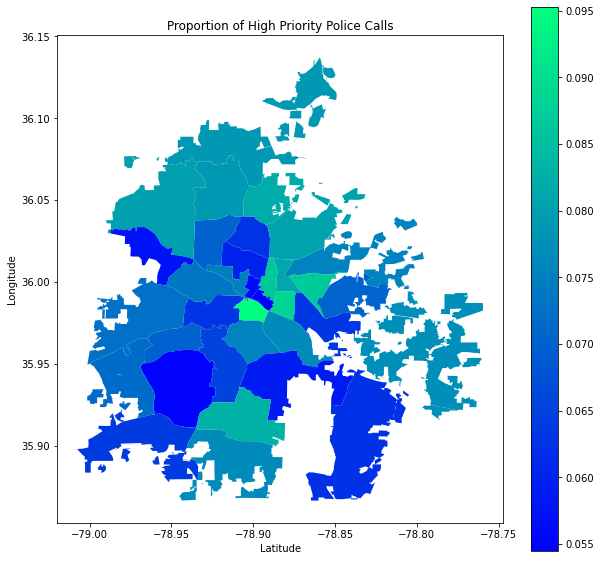

In [974]:
#Plot chloropleth map of proportion of high priority calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

combcalls_merge.plot(column='prop_of_pcalls',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Proportion of High Priority Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

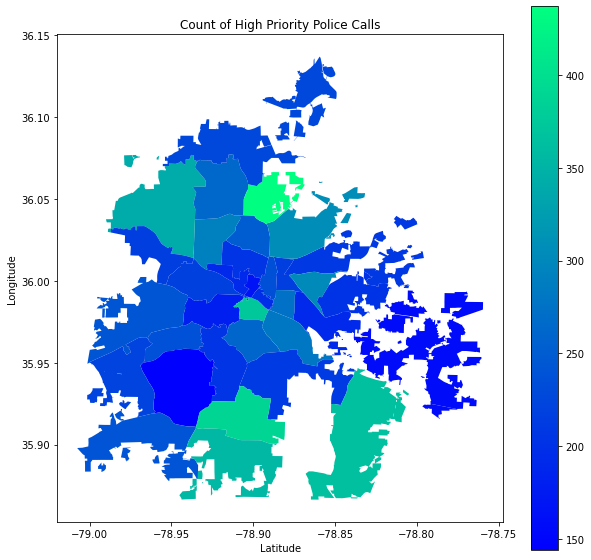

In [975]:
#Plot chloropleth map of number of high priority calls
fig, ax = plt.subplots(figsize = (10,10))

combcalls_merge.plot(column='pcalls_count',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Count of High Priority Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [976]:
#Find the beat with highest proportion of priority levels 2-6
#Create filtered call data with only 2-6 calls
twotosix = ['2', '3', '4', '5', '6']

twosixcalls = dpdcalls[dpdcalls['Priority'].isin(twotosix)]

twosixcalls

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331052,21478310,None,12/31/2021,11:40:03PM,E-911,4,NOISE COMPLAINT,300 CHERRY GROVE ST,2035589,814710,D1,113,Resolved Without Report,0,POINT (-78.87970 35.98843)
331053,21478311,None,12/31/2021,11:40:26PM,Wireless 911 Call,3,SOUND OF SHOTS,E CORNWALLIS RD/S ROXBORO ST,2023820,806257,D4,412,Resolved Without Report,0,POINT (-78.91950 35.96525)
331055,21478321,None,12/31/2021,11:45:14PM,Wireless 911 Call,3,SUSPICIOUS ACTIVITY,2400 GLENBROOK DR,2036593,828406,D2,214,Resolved Without Report,0,POINT (-78.87625 36.02605)
331064,21478336,None,12/31/2021,11:51:01PM,Wireless 911 Call,3,TRESPASS OR UNWANTED,1600 T W ALEXANDER DR,2045831,791379,D4,423,Unfounded,0,POINT (-78.84520 35.92430)


In [977]:
#Grouping policebeats_w_dpd by beat
#Create a new data frame called allcalls
allcalls = policebeats_w_dpd.groupby(['Beat']).size().to_frame(name = 'calls_count').reset_index()
allcalls

,Beat,calls_count
0,111,2730
1,112,2662
2,113,3095
3,114,3041
4,121,2771
5,122,3492
6,123,2890
7,124,2030
8,211,4174
9,212,3404


In [978]:
#Grouping 2-6 calls by beat
#Creating new data frame called onlytwosix
onlytwosix = twosixcalls.groupby(['Beat']).size().to_frame(name = '2_to_6_calls_count').reset_index()
onlytwosix

,Beat,2_to_6_calls_count
0,111,2425
1,112,2352
2,113,2751
3,114,2788
4,121,2530
5,122,3070
6,123,2640
7,124,1859
8,211,3766
9,212,3083


In [979]:
#Add a proportions column to combcalls
combcalls2 = pd.merge(allcalls, onlytwosix, on ='Beat')

combcalls2['prop_of_2_6_calls']= combcalls2['2_to_6_calls_count'] / combcalls2['calls_count']

combcalls2.sort_values(by='prop_of_2_6_calls', inplace=True, ascending=False)

combcalls2.head()

,Beat,calls_count,2_to_6_calls_count,prop_of_2_6_calls
27,414,3587,3322,0.926122
23,324,3773,3472,0.920223
21,322,2626,2412,0.918507
33,512,2931,2689,0.917434
3,114,3041,2788,0.916804


In [980]:
#Merge policebeats data with combcalls2
#Label merged data as combcalls2_merge
combcalls2_merge = pd.merge(combcalls2, policebeats2, on ='Beat')

combcalls2_merge.head(3)

,Beat,calls_count,2_to_6_calls_count,prop_of_2_6_calls,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,414,3587,3322,0.926122,88,98360.617188,I,yes,D4,414,None,1.342096e+08,98360.616926,"POLYGON ((-78.87657 35.95794, -78.87649 35.957..."
1,414,3587,3322,0.926122,94,4287.661133,I,yes,D4,414,None,7.385015e+05,4287.660656,"POLYGON ((-78.83804 35.94471, -78.83821 35.944..."
2,324,3773,3472,0.920223,106,128371.601562,I,yes,D3,324,None,1.523746e+08,128371.584023,"POLYGON ((-78.96136 35.91888, -78.96118 35.918..."


In [981]:
#Merged the data with combcalls by changing the index
combcalls2_merge = policebeats2.set_index('Beat').join(combcalls2.set_index('Beat'))

combcalls2_merge.head(3)

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry,calls_count,2_to_6_calls_count,prop_of_2_6_calls
Beat,,,,,,,,,,,,,
111,50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",2730,2425,0.888278
112,51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",2662,2352,0.883546
113,62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",3095,2751,0.888853


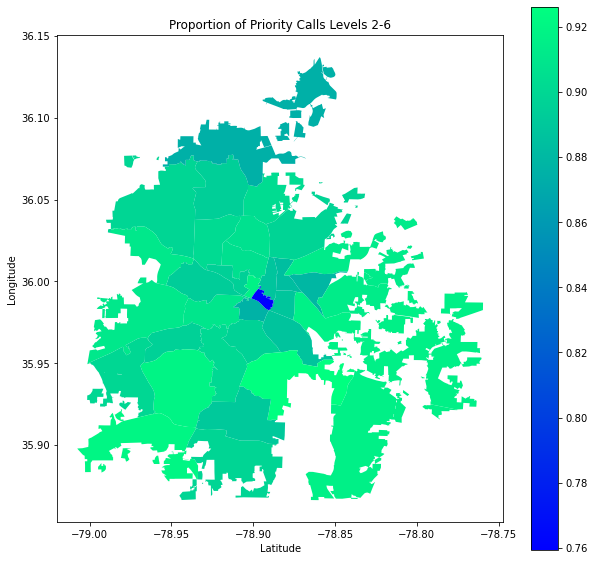

In [997]:
#Plot chloropleth map of proportion of priority 2-6 calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

combcalls2_merge.plot(column='prop_of_2_6_calls',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Proportion of Priority Calls Levels 2-6')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [983]:
##Census Data Analysis
#Load in census data for North Carolina
ncblockmap = gpd.read_file('/Users/sadiesheridan/Desktop/tl_2021_37_tabblock20/tl_2021_37_tabblock20.shp')
ncblockmap.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,37,037,020203,2037,370370202032037,Block 2037,G5040,R,None,None,S,2401181,1879,+35.7514163,-079.2909223,"POLYGON ((-79.29947 35.75562, -79.29942 35.756..."
1,37,105,030401,1015,371050304011015,Block 1015,G5040,R,None,None,S,537166,1888,+35.4895705,-079.1541245,"POLYGON ((-79.16050 35.48907, -79.15995 35.489..."
2,37,183,053615,2052,371830536152052,Block 2052,G5040,R,None,None,S,0,10154,+35.8791781,-078.8085709,"POLYGON ((-78.80964 35.87904, -78.80962 35.879..."
3,37,035,011501,2036,370350115012036,Block 2036,G5040,R,None,None,S,2009262,7616,+35.5829239,-081.0441821,"POLYGON ((-81.05569 35.58896, -81.05537 35.589..."
4,37,037,020201,2003,370370202012003,Block 2003,G5040,R,None,None,S,1557161,14689,+35.8325256,-079.3723536,"POLYGON ((-79.37919 35.83136, -79.37905 35.831..."


In [984]:
#Set the crs for the census data
ncblockmap = ncblockmap.to_crs("EPSG:4326")

In [985]:
#Load in race data from census bureau
#Change id variable to GEOID20
racedata = pd.read_csv('/Users/sadiesheridan/Downloads/Race data/DECENNIALPL2020.P1_data_with_overlays_2022-06-06T132656.csv', skiprows = 1)
racedata['GEOID20'] = racedata['id'].str[-15:]
racedata.drop('id', axis=1, inplace=True)
racedata

,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,...,!!Total:!!Population of two or more races:!!Population of five races:,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of six races:,!!Total:!!Population of two or more races:!!Population of six races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,GEOID20
0,"Block 1000, Block Group 1, Census Tract 1.01, ...",108,102,18,61,3,0,0,20,6,...,0,0,0,0,0,0,0,0,0,370630001011000
1,"Block 1001, Block Group 1, Census Tract 1.01, ...",35,28,13,5,0,0,0,10,7,...,0,0,0,0,0,0,0,0,0,370630001011001
2,"Block 1002, Block Group 1, Census Tract 1.01, ...",38,34,17,9,0,0,0,8,4,...,0,0,0,0,0,0,0,0,0,370630001011002
3,"Block 1003, Block Group 1, Census Tract 1.01, ...",43,43,21,19,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,370630001011003
4,"Block 1004, Block Group 1, Census Tract 1.01, ...",31,30,5,18,0,1,0,6,1,...,0,0,0,0,0,0,0,0,0,370630001011004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,"Block 1069, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,370639801001069
4398,"Block 1070, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,370639801001070
4399,"Block 1071, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,370639801001071
4400,"Block 1072, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,370639801001072


In [986]:
#Filter the block map to only include Durham blocks (63)
durhamblockmap = ncblockmap[ncblockmap["COUNTYFP20"]=="063"]
len(durhamblockmap), len(ncblockmap),len(racedata),len(policebeats)

(4401, 236638, 4402, 83)

In [987]:
#Merge the Durham block data with the race data
durhamracemap = pd.merge(racedata, durhamblockmap, on ='GEOID20')
durhamracemap

,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,...,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,"Block 1000, Block Group 1, Census Tract 1.01, ...",108,102,18,61,3,0,0,20,6,...,G5040,R,None,None,S,655575,0,+36.0194814,-078.8821382,"POLYGON ((-78.88998 36.01852, -78.88995 36.019..."
1,"Block 1001, Block Group 1, Census Tract 1.01, ...",35,28,13,5,0,0,0,10,7,...,G5040,R,None,None,S,23209,0,+36.0205516,-078.8893121,"POLYGON ((-78.88993 36.02006, -78.88990 36.021..."
2,"Block 1002, Block Group 1, Census Tract 1.01, ...",38,34,17,9,0,0,0,8,4,...,G5040,R,None,None,S,17466,0,+36.0205916,-078.8869754,"POLYGON ((-78.88749 36.02015, -78.88746 36.021..."
3,"Block 1003, Block Group 1, Census Tract 1.01, ...",43,43,21,19,0,0,0,3,0,...,G5040,R,None,None,S,22809,0,+36.0205318,-078.8880959,"POLYGON ((-78.88872 36.01988, -78.88867 36.021..."
4,"Block 1004, Block Group 1, Census Tract 1.01, ...",31,30,5,18,0,1,0,6,1,...,G5040,R,None,None,S,21727,0,+36.0221289,-078.8796703,"POLYGON ((-78.88098 36.02211, -78.87992 36.022..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,"Block 1068, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,...,G5040,R,None,None,S,19590,0,+35.8697575,-078.8648679,"POLYGON ((-78.86527 35.87075, -78.86498 35.870..."
4397,"Block 1069, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,...,G5040,R,None,None,S,8413,0,+35.8691012,-078.8652956,"POLYGON ((-78.86568 35.87061, -78.86540 35.870..."
4398,"Block 1070, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,...,G5040,R,None,None,S,104861,0,+35.8687255,-078.8673419,"POLYGON ((-78.87003 35.86799, -78.86977 35.868..."
4399,"Block 1071, Block Group 1, Census Tract 9801, ...",0,0,0,0,0,0,0,0,0,...,G5040,R,None,None,S,59161,0,+35.8957583,-078.8703320,"POLYGON ((-78.87243 35.89600, -78.87216 35.896..."


In [988]:
#Check the geometry of the merged data
durhamracemap.geometry

0       POLYGON ((-78.88998 36.01852, -78.88995 36.019...
1       POLYGON ((-78.88993 36.02006, -78.88990 36.021...
2       POLYGON ((-78.88749 36.02015, -78.88746 36.021...
3       POLYGON ((-78.88872 36.01988, -78.88867 36.021...
4       POLYGON ((-78.88098 36.02211, -78.87992 36.022...
                              ...                        
4396    POLYGON ((-78.86527 35.87075, -78.86498 35.870...
4397    POLYGON ((-78.86568 35.87061, -78.86540 35.870...
4398    POLYGON ((-78.87003 35.86799, -78.86977 35.868...
4399    POLYGON ((-78.87243 35.89600, -78.87216 35.896...
4400    POLYGON ((-78.87929 35.93618, -78.87927 35.937...
Name: geometry, Length: 4401, dtype: geometry

In [989]:
#Change the column names
durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[#,@,&,!]', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[:]', '_')
durhamracemap.head()

/var/folders/_r/3n990z1121zg5rjwb25b1tvm0000gn/T/ipykernel_20172/61179071.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/_r/3n990z1121zg5rjwb25b1tvm0000gn/T/ipykernel_20172/61179071.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/_r/3n990z1121zg5rjwb25b1tvm0000gn/T/ipykernel_20172/61179071.py:3: FutureWarning: The default value of regex will change from True to False in a future

,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,...,mtfcc20,ur20,uace20,uatype20,funcstat20,aland20,awater20,intptlat20,intptlon20,geometry
0,"Block 1000, Block Group 1, Census Tract 1.01, ...",108,102,18,61,3,0,0,20,6,...,G5040,R,None,None,S,655575,0,+36.0194814,-078.8821382,"POLYGON ((-78.88998 36.01852, -78.88995 36.019..."
1,"Block 1001, Block Group 1, Census Tract 1.01, ...",35,28,13,5,0,0,0,10,7,...,G5040,R,None,None,S,23209,0,+36.0205516,-078.8893121,"POLYGON ((-78.88993 36.02006, -78.88990 36.021..."
2,"Block 1002, Block Group 1, Census Tract 1.01, ...",38,34,17,9,0,0,0,8,4,...,G5040,R,None,None,S,17466,0,+36.0205916,-078.8869754,"POLYGON ((-78.88749 36.02015, -78.88746 36.021..."
3,"Block 1003, Block Group 1, Census Tract 1.01, ...",43,43,21,19,0,0,0,3,0,...,G5040,R,None,None,S,22809,0,+36.0205318,-078.8880959,"POLYGON ((-78.88872 36.01988, -78.88867 36.021..."
4,"Block 1004, Block Group 1, Census Tract 1.01, ...",31,30,5,18,0,1,0,6,1,...,G5040,R,None,None,S,21727,0,+36.0221289,-078.8796703,"POLYGON ((-78.88098 36.02211, -78.87992 36.022..."


In [990]:
#Find the proportion of specific races compared to the total population
durhamracemap['propwhite']= durhamracemap['total_population_of_one_race_white_alone'] / durhamracemap['total_']
durhamracemap['propblack']= durhamracemap['total_population_of_one_race_black_or_african_american_alone'] / durhamracemap['total_']

AttributeError: 'Line2D' object has no property 'aspect'

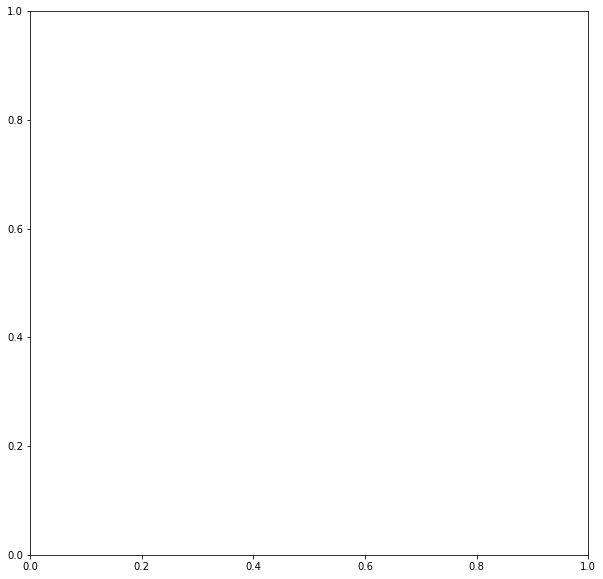

In [991]:
#Plot chloropleth map with merged data for white population
fig, ax = plt.subplots(figsize = (10,10))

durhamracemap.plot(column='propwhite',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is White alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

AttributeError: 'Line2D' object has no property 'aspect'

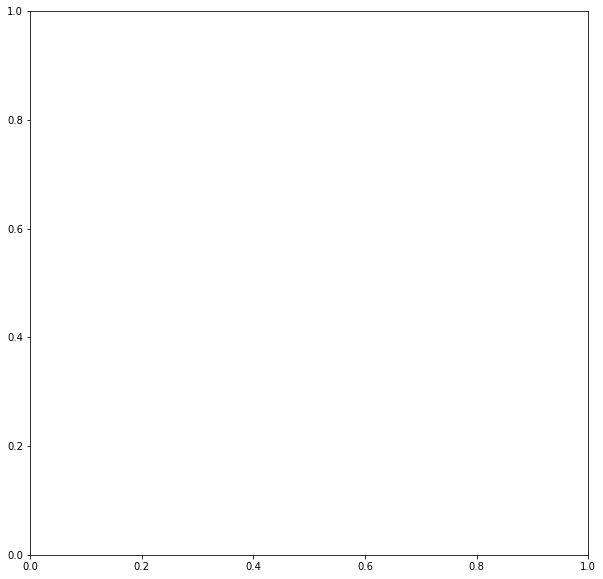

In [ ]:
#Plot chloropleth map with merged data for Black population
fig, ax = plt.subplots(figsize = (10,10))

durhamracemap.plot(column='propblack',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is Black or African American alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()